<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/05_embeddings/fastText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FastText

Carga de los embeddings de fastText en Gensim

In [1]:
from gensim.models.keyedvectors import KeyedVectors

In [2]:
# El listado completo de los vectores disponibles está en https://fasttext.cc/docs/en/crawl-vectors.html
wordvectors_file_vec = 'https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

Vector

In [4]:
wordvectors["hola"]

array([-5.670e-02,  5.340e-02, -6.130e-02, -2.440e-01, -1.366e-01,
        5.670e-02,  5.910e-02, -1.810e-02, -9.960e-02, -1.206e-01,
       -5.050e-02,  7.950e-02,  1.053e-01,  6.820e-02,  1.325e-01,
        3.310e-02, -4.620e-02,  9.190e-02, -1.750e-02,  7.590e-02,
        5.230e-02, -5.350e-02,  1.290e-02,  1.149e-01, -4.020e-02,
        3.160e-02, -1.514e-01,  4.190e-02, -6.790e-02,  2.320e-02,
        3.070e-02,  8.190e-02, -1.450e-02, -1.122e-01, -5.680e-02,
        3.400e-02, -1.000e-03, -9.070e-02, -1.680e-02,  1.009e-01,
        1.248e-01, -1.486e-01, -6.620e-02, -5.230e-02, -2.742e-01,
        1.379e-01,  4.000e-03,  9.410e-02, -3.590e-02,  1.095e-01,
        6.020e-02,  2.642e-01,  6.180e-02,  3.600e-03, -2.710e-02,
        1.617e-01,  6.400e-02, -5.940e-02,  2.050e-02, -1.510e-02,
        9.700e-03,  2.760e-02, -1.165e-01,  5.110e-02, -4.890e-02,
       -1.990e-02, -2.530e-02,  4.650e-02, -3.460e-02,  2.451e-01,
       -1.217e-01,  3.800e-02,  9.400e-03, -4.520e-02,  4.680e

In [5]:
wordvectors["persona"].shape

(300,)

Similitud

In [6]:
wordvectors.similarity('hombre', 'mujer')

0.6847727

In [7]:
wordvectors.similarity('banco', 'justicia')

0.18538794

In [8]:
wordvectors.similar_by_word("gato")

[('perro', 0.8194648623466492),
 ('gatito', 0.8061740398406982),
 ('Gato', 0.7072967886924744),
 ('perrito', 0.6917300820350647),
 ('gatos', 0.6770978569984436),
 ('felino', 0.6705687046051025),
 ('gata', 0.6578809022903442),
 ('cachorro', 0.6557344794273376),
 ('conejo', 0.6412478089332581),
 ('mascota', 0.6264307498931885)]

In [ ]:
wordvectors.most_similar(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.6996200084686279),
 ('princesa', 0.6584170460700989),
 ('monarca', 0.5745182633399963),
 ('emperatriz', 0.5571600794792175),
 ('Rey', 0.5523390173912048),
 ('reyes', 0.5444135665893555),
 ('hija', 0.5440957546234131),
 ('Reina', 0.5410171747207642),
 ('consorte', 0.5355187654495239),
 ('infanta', 0.5331934094429016)]

Exclusión

In [9]:
lista=('abril', 'mayo', 'septiembre', 'martes', 'julio')
wordvectors.doesnt_match(lista)

'martes'

In [10]:
wordvectors["persona"].shape

(300,)

In [11]:
wordvectors.vectors.shape

(100000, 300)

In [12]:
wordvectors

Vamos a quedarnos solo con 300 palabras para hacer un ejercicio de visualización

In [13]:
vectores=wordvectors.vectors[1000:1300,]

In [20]:
keys=[]
for key in range(1300,1600):
  keys.append(wordvectors.index_to_key[key])

In [19]:
wordvectors.vectors.shape

(100000, 300)

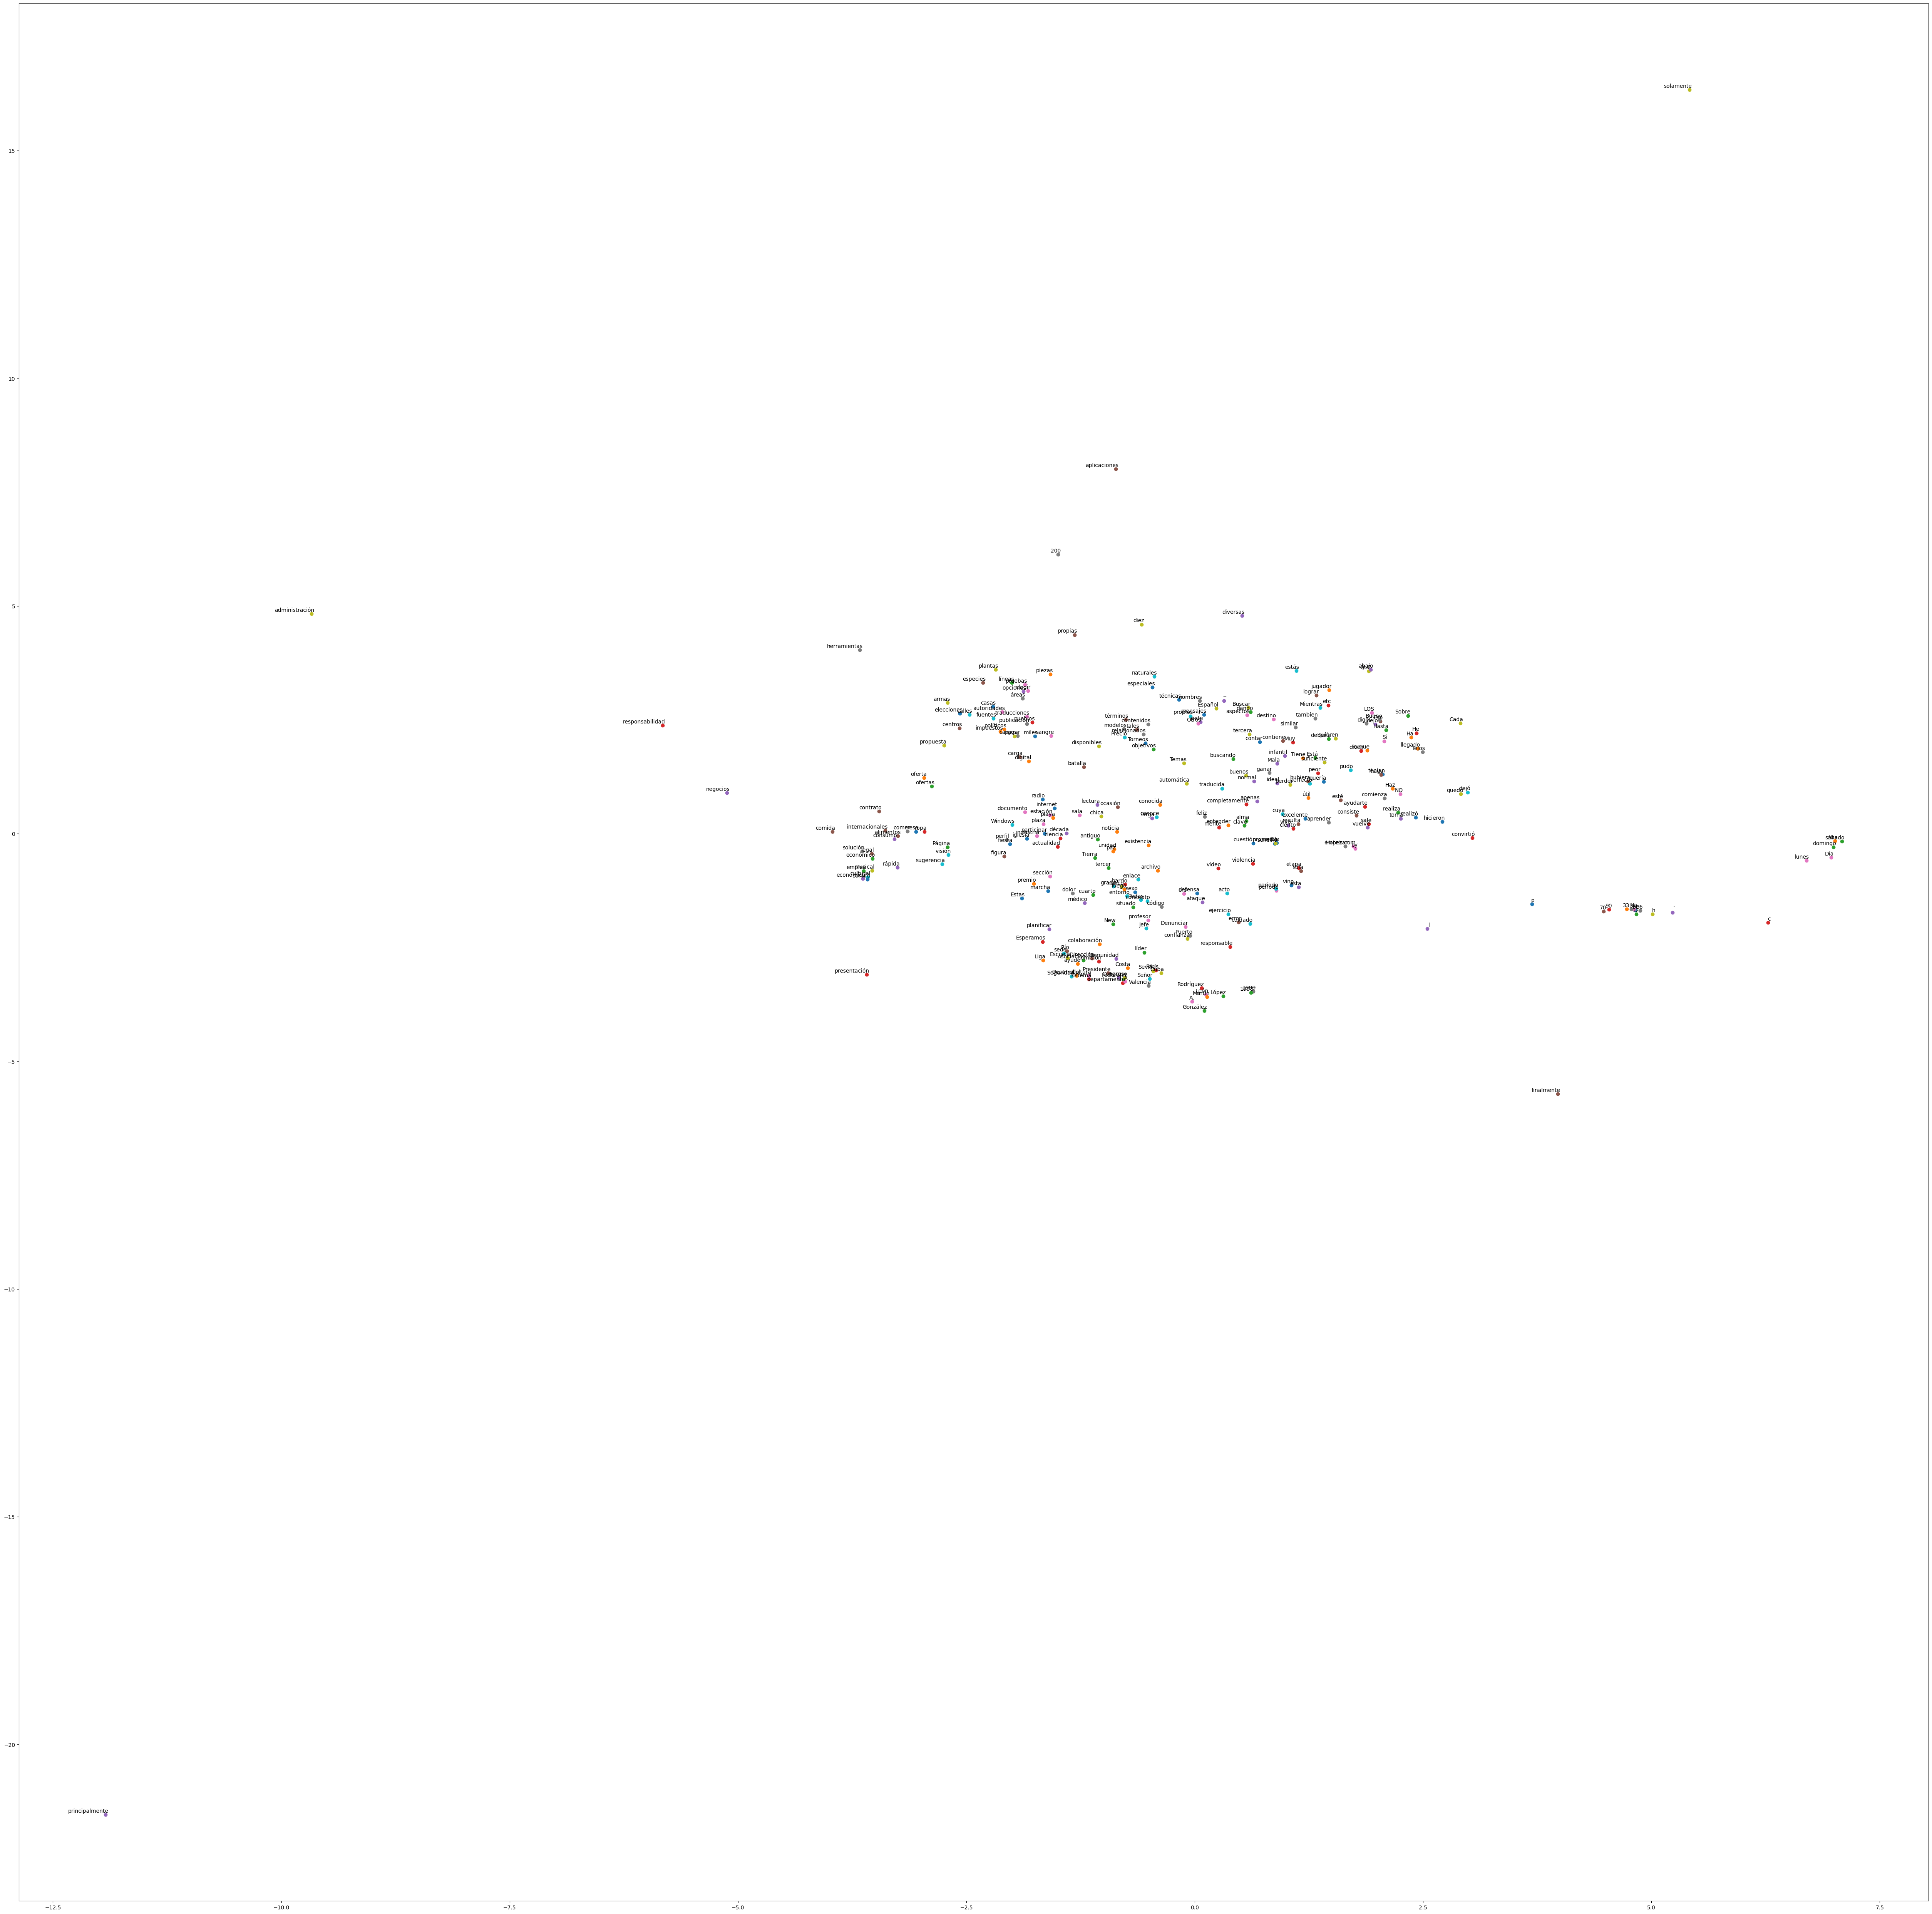

In [21]:
 from sklearn.manifold import TSNE
 import numpy as np
 import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    for word in keys:
        tokens.append(model[word])
        labels.append(word)
    
    tokens=np.array(tokens)
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=250)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(64, 64)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(wordvectors)